In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

output_folder = 'visuals'
os.makedirs(output_folder, exist_ok=True)

In [3]:
df = pd.read_csv("netflix-movies-tv-shows.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,01-Jan-20,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [8]:
error_rows = df[df['rating'].str.contains('min', na=False)]

df.loc[error_rows.index, 'duration'] = error_rows['rating']
df.loc[error_rows.index, 'rating'] = 'Unknown'


In [9]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

What is the total number of Movies vs TV Shows?

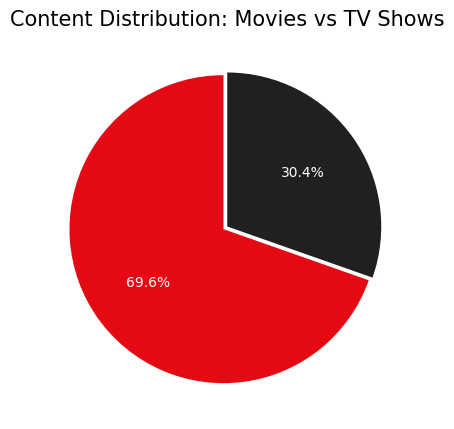

In [11]:
type_count = df['type'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', colors=['#E50914', '#221F1F'], textprops={'color': 'white'},
        explode=[0.03, 0], startangle=90)
plt.title('Content Distribution: Movies vs TV Shows', fontsize=15)
plt.savefig(f'{output_folder}/MoviesvsTVShows.png', dpi = 300, bbox_inches = 'tight')
plt.show()

What is the total number of Netflix titles under each rating?

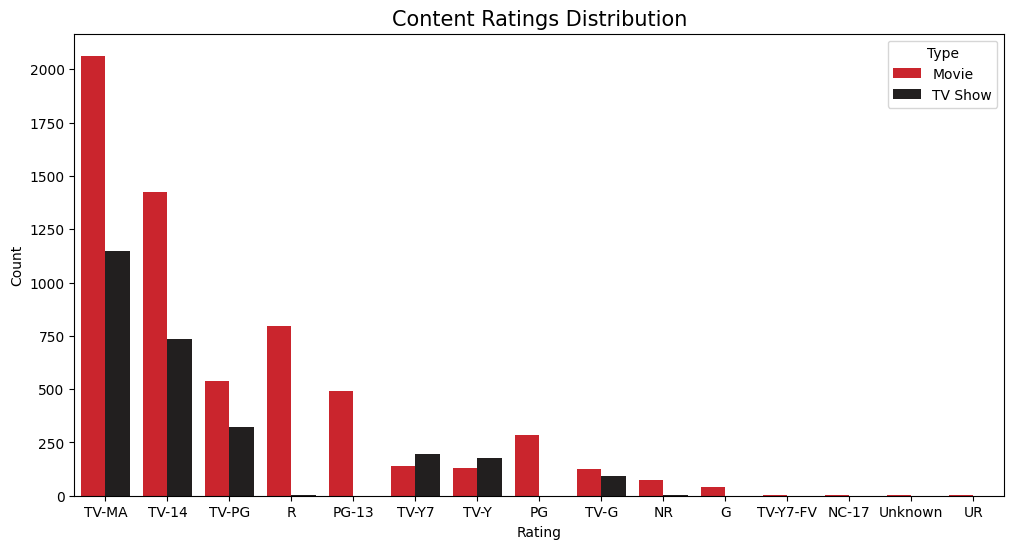

In [12]:
rating = df['rating'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(df, x='rating', order=rating, hue='type', palette=['#E50914', '#221F1F'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.title('Content Ratings Distribution', fontsize=15)
plt.savefig(f'{output_folder}/RatingsDistribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

How has Netflix's catalog grown over the years since its relevance in 2010?

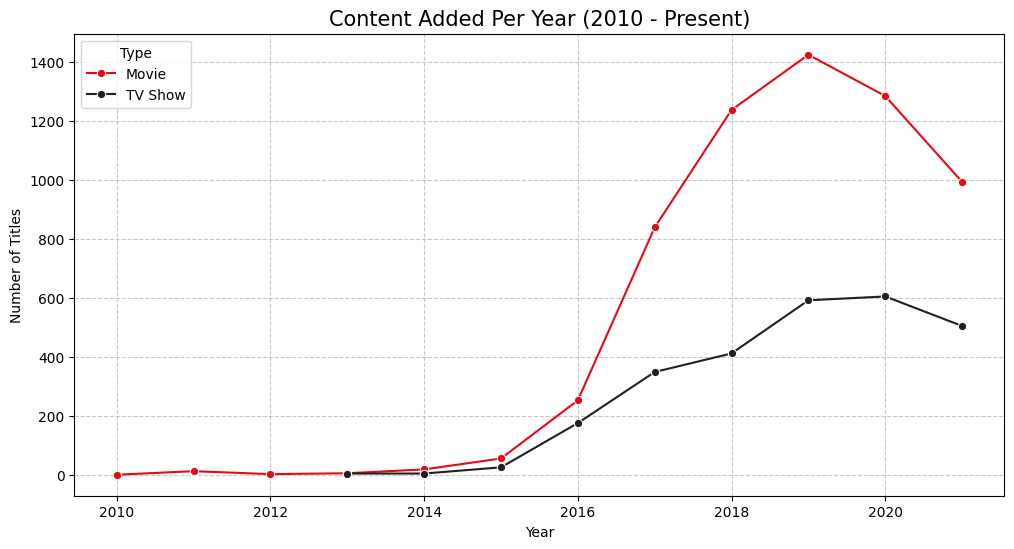

In [13]:
content_added_by_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')
content_added_by_year = content_added_by_year[content_added_by_year['year_added'] >= 2010]

plt.figure(figsize=(12,6))
sns.lineplot(content_added_by_year, x='year_added', y='count', hue='type', marker='o', palette=['#E50914', '#221F1F'])
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Content Added Per Year (2010 - Present)', fontsize=15)
plt.savefig(f'{output_folder}/ContentAddedPerYear.png', dpi = 300, bbox_inches = 'tight')
plt.show()

What are the top 10 countries which produces the most content?

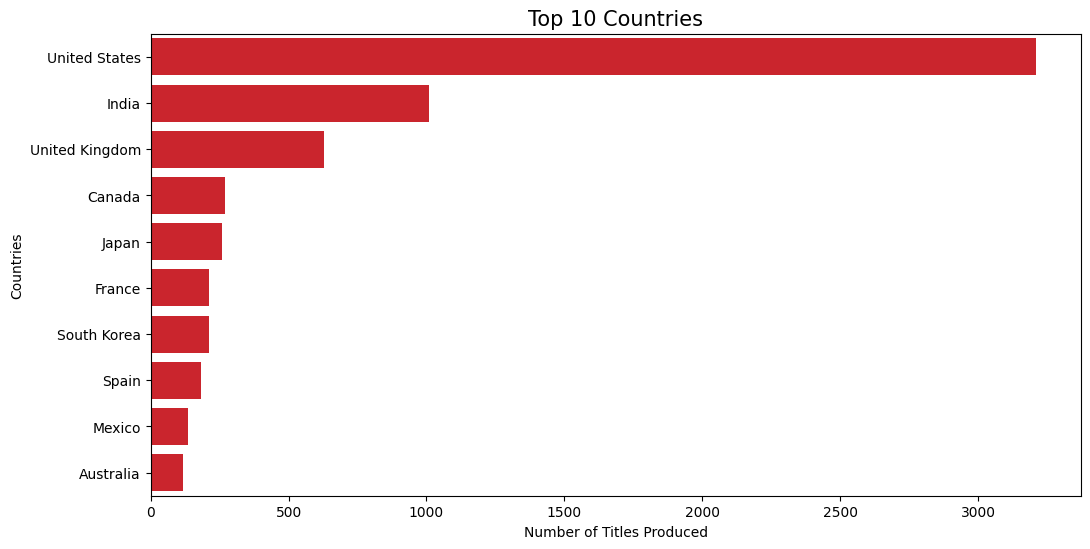

In [14]:
primary_country = df['country'].apply(lambda x : x.split(',')[0])
primary_country_filtered = primary_country[primary_country != 'Unknown']
top_10_countries = primary_country_filtered.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, color='#E50914')
plt.xlabel('Number of Titles Produced')
plt.ylabel('Countries')
plt.title('Top 10 Countries', fontsize=15)
plt.savefig(f'{output_folder}/Top10Countries.png', dpi = 300, bbox_inches = 'tight')
plt.show()

What is the "standard" length of a movie on Netflix?

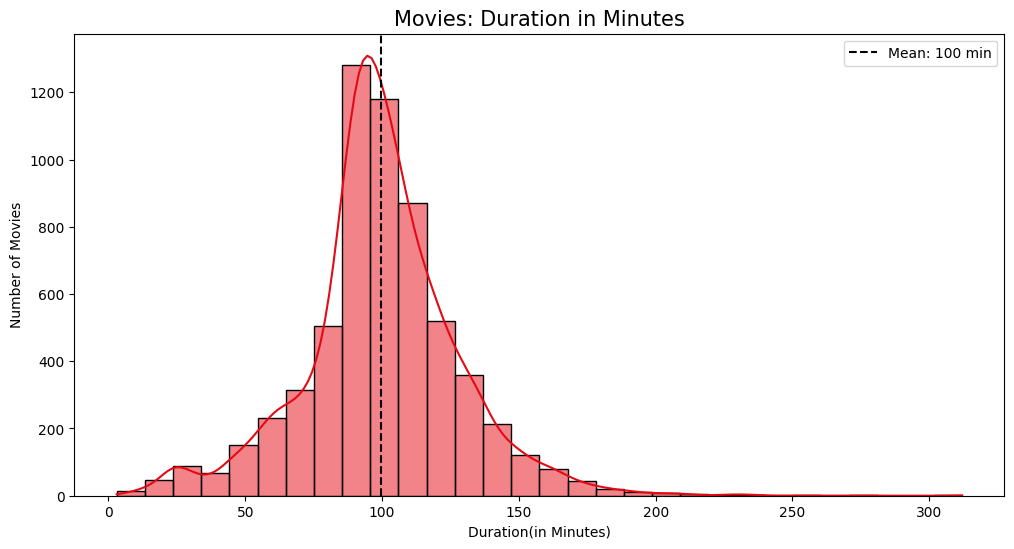

In [15]:
df['duration_num'] = df['duration'].astype(str).str.extract('(\\d+)').astype(float)
movies = df[df['type'] == 'Movie'].copy()

plt.figure(figsize=(12, 6))
sns.histplot(movies, x='duration_num', kde=True, bins=30, color='#E50914', edgecolor='black')
plt.xlabel('Duration(in Minutes)')
plt.ylabel('Number of Movies')
plt.axvline(movies['duration_num'].mean(), color='k', linestyle='--', label=f'Mean: {movies['duration_num'].mean():.0f} min')
plt.legend()
plt.title('Movies: Duration in Minutes', fontsize=15)
plt.savefig(f'{output_folder}/MoviesDurationDistribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Do TV Shows survive past Season 1?

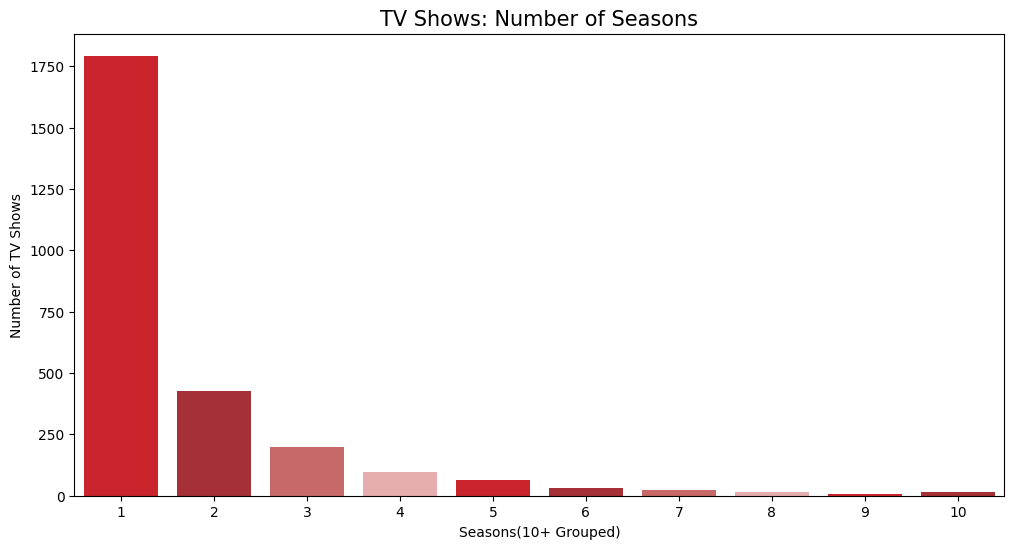

In [16]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].apply(lambda x : int(x.split(' ')[0]))
tv_shows['seasons_group'] = tv_shows['seasons'].apply(lambda x : x if x < 10 else 10)

plt.figure(figsize=(12, 6))
sns.countplot(tv_shows, x='seasons_group', palette=['#E50914', '#B81D24', '#D65A5A', '#EFA3A3'])
plt.xlabel('Seasons(10+ Grouped)')
plt.ylabel('Number of TV Shows')
plt.title('TV Shows: Number of Seasons', fontsize=15)
plt.savefig(f'{output_folder}/TVShowsSeasonsDistribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

What are the top 10 genres with the most number of Netflix titles?

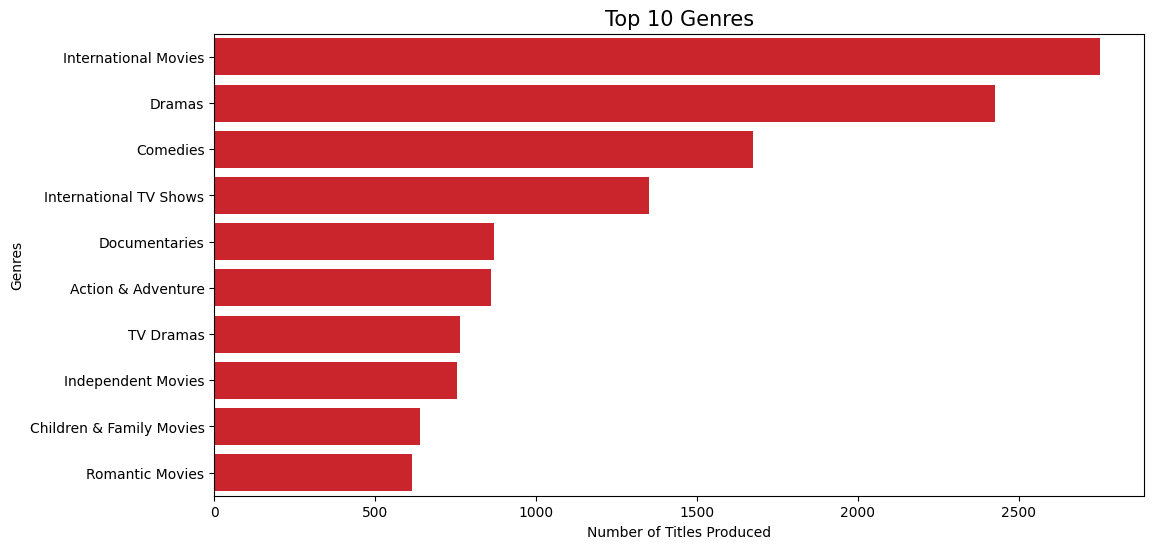

In [17]:
df_genres = df.assign(genres=df['listed_in'].str.split(', ')).explode('genres')
top_10_genres = df_genres['genres'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, color='#E50914')
plt.xlabel('Number of Titles Produced')
plt.ylabel('Genres')
plt.title('Top 10 Genres', fontsize=15)
plt.savefig(f'{output_folder}/Top10Genres.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Does Netflix has a specific "release strategy"?

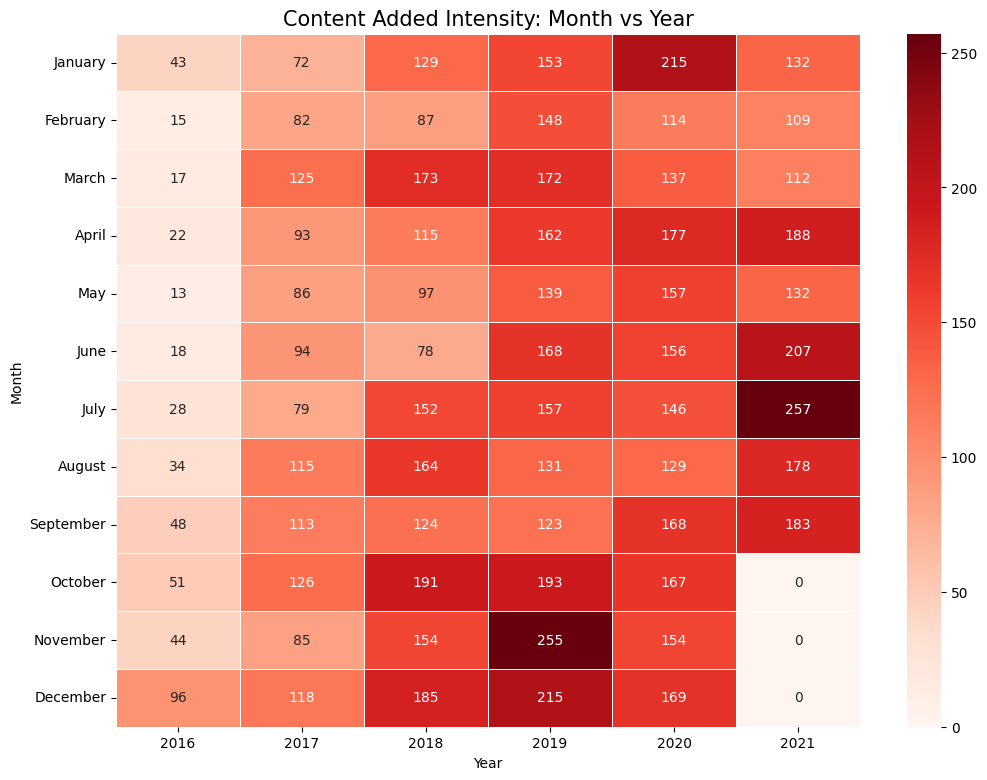

In [18]:
df_recent = df[df['year_added'] >= 2016]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
recent_data = pd.pivot_table(df_recent, values='show_id', index='month_added', columns='year_added', aggfunc='count',
                             fill_value=0)
recent_data = recent_data.reindex(month_order)

plt.figure(figsize=(12,9))
sns.heatmap(recent_data, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.title('Content Added Intensity: Month vs Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig(f'{output_folder}/ContentAddedIntensityHeatmap.png', dpi=300, bbox_inches='tight')
plt.show()
